# Part II - The impact of the loans caractéristics on the number of investors and percent funded
## by (Dakhouche Salah Eddine)

## Investigation Overview


In this investigation, I wanted to look at the characteristics of loans that could have an impact on the number of investors and the percent funded. The main focus was on the estimated return, the prosper score, the income range and the loan original amount.


## Dataset Overview

The data set contain 113937 records of loans and 82 columns, i choosed 10 columns that I consider that they could have the most impact of the two varialbes

In [76]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [77]:
# load in the dataset into a pandas dataframe
loan=pd.read_csv('loans.csv')
merged_sample = pd.read_csv('sample.csv')
loan.drop('Unnamed: 0', axis=1,inplace=True)
merged_sample.drop('Unnamed: 0', axis=1,inplace=True)

In [78]:
# setups
colorM=(120/255, 149/255, 178/255)
rng = ['Not employed','$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']
incrang = pd.api.types.CategoricalDtype(ordered=True, categories=rng)
loan['IncomeRange']=loan['IncomeRange'].astype(incrang)
loan = loan.loc[loan['ProsperScore']<11]
merged_sample = merged_sample.loc[merged_sample['ProsperScore']<11]
merged_sample['IncomeRange']=merged_sample['IncomeRange'].astype(incrang)
loan_samp=loan.sample(2000)

In [79]:
def Mscatter(data,x,y,c,til,lim):
  plt.figure(figsize = [10, 8])
  g = sb.FacetGrid(data = data, hue = c, height = 5, palette='viridis')
  g.map(plt.scatter, x, y,alpha  = 0.5)
  g.add_legend()
  plt.xlim(lim)
  plt.title(til)
  plt.show()

## The distribution of Percent Funded

This variable was an important one in our analysis but unfortunately, the majority of loans are fully funded and the correlation with other variables is so low that makes this variable unexploitable.

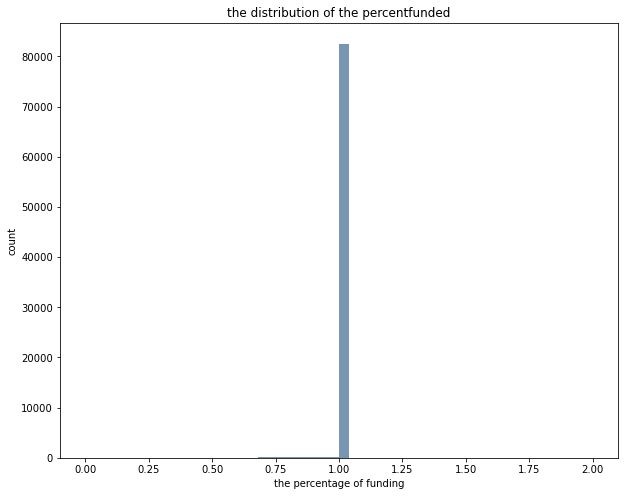

In [80]:
rang = np.arange(0,2+0.04,0.04)
plt.figure(figsize=(10,8))
plt.hist(data=loan, x='PercentFunded',bins=rang,color=colorM)
plt.xlabel("the percentage of funding")
plt.ylabel("count")
plt.title('the distribution of the percentfunded')
plt.show()

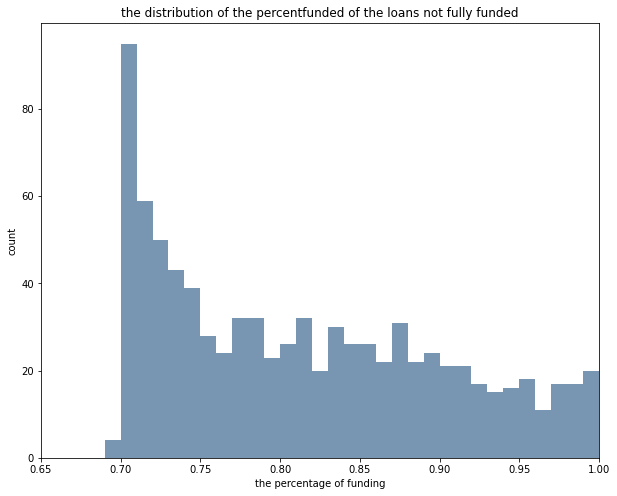

In [81]:
rang = np.arange(0.65,1+0.01,0.01)
plt.figure(figsize=(10,8))
plt.hist(data=loan.loc[loan['PercentFunded']<1], x='PercentFunded',bins=rang,color=colorM)
plt.xlim((0.65,1))
plt.xlabel("the percentage of funding")
plt.ylabel("count")
plt.title('the distribution of the percentfunded of the loans not fully funded')
plt.show()

## the distribution of the number of investors on each loan

The number of investors has a peak of 1 investor which means that a lot of loans are funded by 1 investor and start to decrease. but with a log transformation, we can see another peak between 30 and 300.

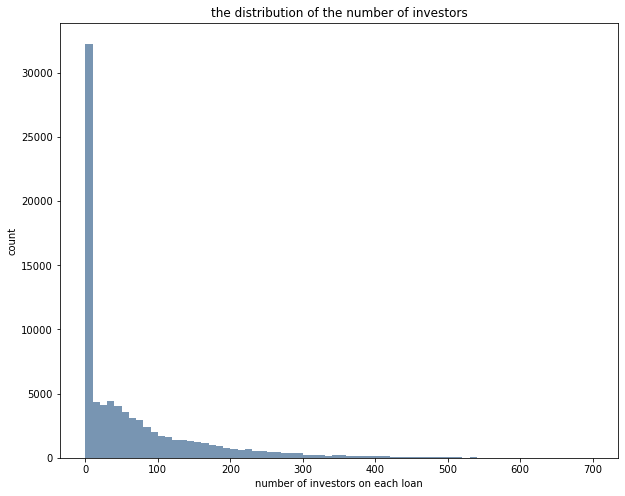

In [82]:
rang = np.arange(0,700+10,10)
plt.figure(figsize=(10,8))
plt.hist(data=loan, x='Investors',bins=rang,color=colorM)
plt.xlabel("number of investors on each loan")
plt.ylabel("count")
plt.title('the distribution of the number of investors')
plt.show()

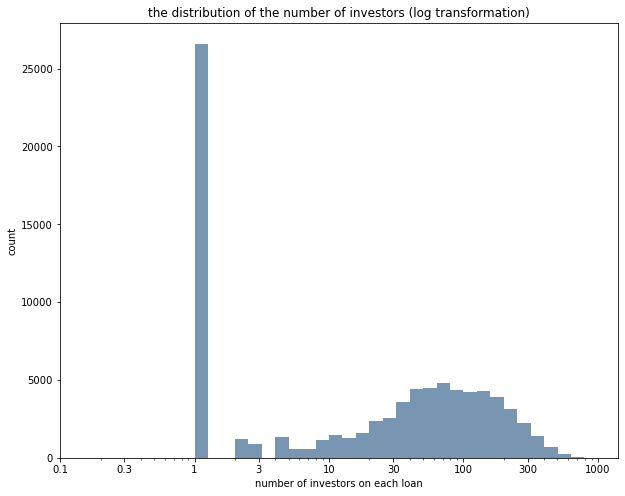

In [83]:
bins = 10 ** np.arange(0, 3+0.1, 0.1)

# ticks needed for the viz
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=(10,8))
# hist
plt.hist(data=loan, x='Investors', bins=bins,color=colorM);

# log transformation
plt.xscale('log')
plt.xlabel("number of investors on each loan")
plt.ylabel("count")
plt.title('the distribution of the number of investors (log transformation)')
# Appliquer les x-ticks
plt.xticks(ticks, labels);

## the distribution of the number of investors on each loan
this variable represents the estimated risk of the loans, the higher the score the lower the risk. we can see a normal distribution of the risk scores

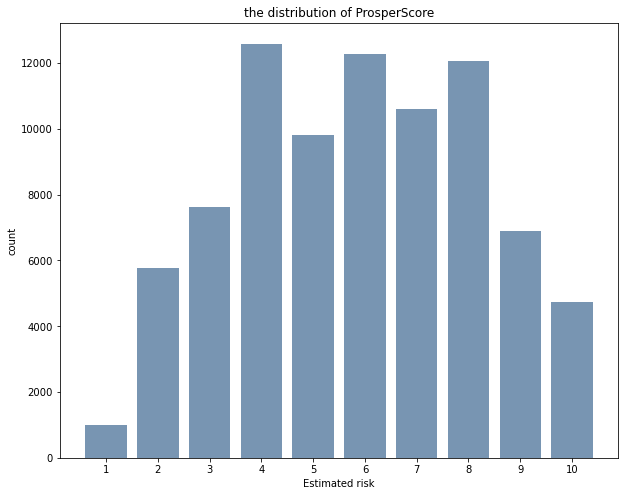

In [84]:

plt.figure(figsize=(10,8))
plt.colorbar=(colorM)
x=loan['ProsperScore'].value_counts().sort_index().index
y=loan['ProsperScore'].value_counts().sort_index()
plt.bar(x,y ,color=colorM)
plt.xticks(x, ('1', '2', '3', '4','5','6','7','8','9','10'))
plt.xlabel('Estimated risk')
plt.ylabel("count")
plt.title('the distribution of ProsperScore')
plt.show()

## Distribution of the Estimated return
We can see that the distribution of the estimated return variable can be considered normal with a peak of 9% and the range is between 1% and 23%


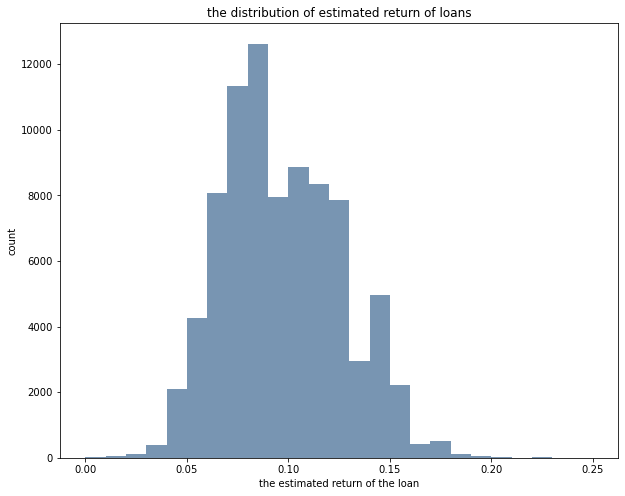

In [85]:
rang = np.arange(0,0.25+0.01,0.01)
plt.figure(figsize=(10,8))
plt.hist(data=loan, x='EstimatedReturn',bins=rang,color=colorM)
plt.xlabel("the estimated return of the loan")
plt.ylabel("count")
plt.title('the distribution of estimated return of loans')
plt.show()

## Distribution of the Income range
The majority of borrowers have an income range between 25000 and 75000 and in second place are the borrowers with incomes of 75000 +

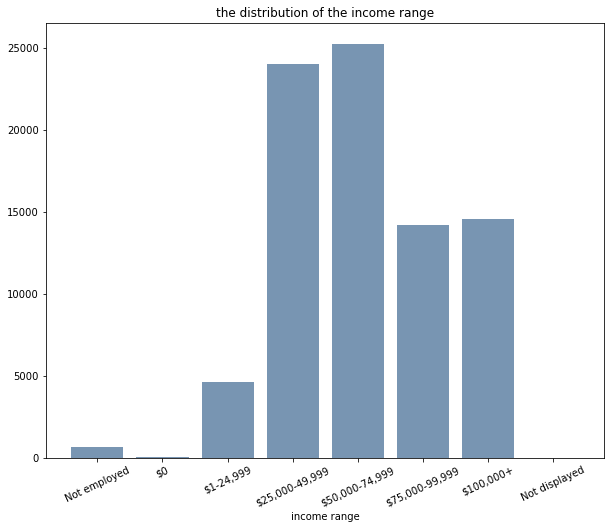

In [86]:
x=loan['IncomeRange'].value_counts().sort_index().index
y=loan['IncomeRange'].value_counts().sort_index()
plt.figure(figsize=(10,8))
plt.colorbar=(colorM)
plt.bar(x,y ,color=colorM)
plt.xticks(rotation=25)
plt.xlabel('income range')
plt.title('the distribution of the income range')
plt.show()

## Investors vs proser risk and Investors vs income range
ther is a positive relation between the number of investors and risk scores, the higher the prosper score the higher the number of investors

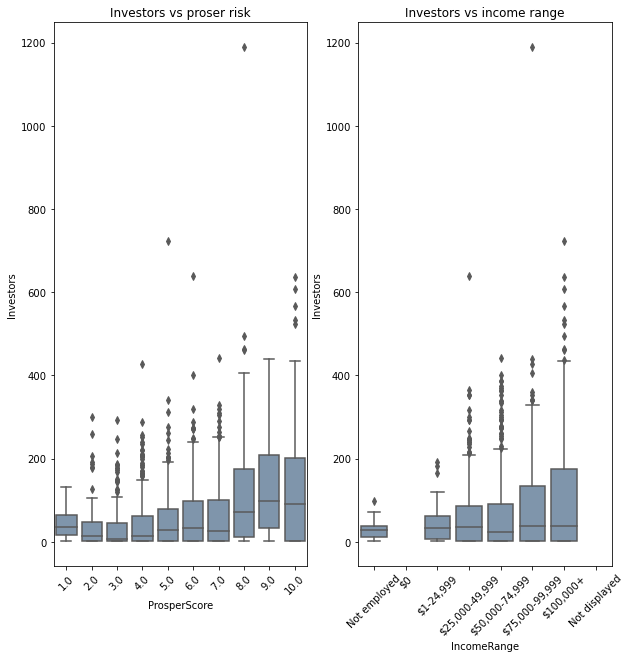

In [87]:
plt.figure(figsize = [10, 10])
plt.subplot(1,2,1)
sb.boxplot(data=loan_samp, x='ProsperScore', y='Investors', color=colorM)
plt.xticks(rotation=45)
plt.title('Investors vs proser risk')
plt.subplot(1,2,2)
sb.boxplot(data=loan_samp, x='IncomeRange', y='Investors', color=colorM)
plt.xticks(rotation=45)
plt.title('Investors vs income range')
plt.show()

## investors vs LoanOriginal amount
I found that the higher the amount the higher the investors, which means that investors are not willing to put too much money into loans with higher amounts.

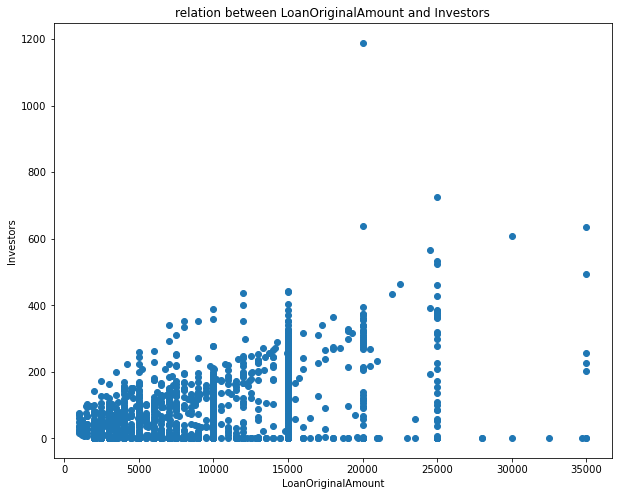

In [88]:
plt.figure(figsize = [10, 8])
plt.scatter(data =loan_samp , x = 'LoanOriginalAmount', y = 'Investors')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Investors')
plt.title('relation between LoanOriginalAmount and Investors')
plt.show()

## Investors vs Loan original amount vs prosper score
I found that loans with low amount are safer and have low number of investors

<Figure size 720x576 with 0 Axes>

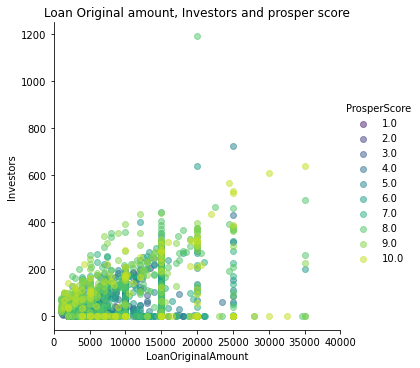

In [89]:
Mscatter(data =loan_samp, x = 'LoanOriginalAmount', y = 'Investors',til='Loan Original amount, Investors and prosper score',c='ProsperScore',lim=(0,40000));

## Investors vs Loan original amount vs Income Range
I found that the higher the income range the safer the loan, and even if the income range is higher the borrowers demand lower amounts

<Figure size 720x576 with 0 Axes>

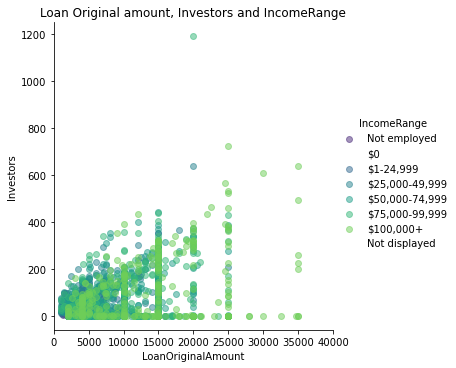

In [90]:
Mscatter(data =loan_samp, x = 'LoanOriginalAmount', y = 'Investors',til='Loan Original amount, Investors and IncomeRange',c='IncomeRange',lim=(0,40000));

## Conclusion
We can understand from this data set that the number of investors depends on the amount of the loans, the higher the amount the higher the investors, and we can say that investors are more interested in lower risks than the estimated returns, and they are willing to invest on lown with the lower amount with lower estimated return and with a higher prosper risk and higher income range of the borrower. Unfortunately, we cannot explain the PercentFunded variable due to the nature of the dataset

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [91]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 911264 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "E:\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "E:\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "E:\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "E:\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "E:\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "E:\anaconda3\lib\site-packages\nbconvert\n

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 